# Final Project Template 

## 1) Get your data
You may use any data set(s) you like, so long as they meet these criteria:

* Your data must be publically available for free.
* Your data should be interesting to _you_. You want your final project to be something you're proud of.
* Your data should be "big enough":
    - It should have at least 1,000 rows.
    - It should have enough of columns to be interesting.
    - If you have questions, contact a member of the instructional team.

## 2) Provide a link to your data
Your data is required to be free and open to anyone.
As such, you should have a URL which anyone can use to download your data:

In [ ]:
# Enter link here.
https://github.com/CHT2016/final-project/blob/master/

## 3) Import your data
In the space below, import your data.
If your data span multiple files, read them all in.
If applicable, merge or append them as needed.

In [11]:
#Import all necessary materials for Data Analysis 
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
#Read in the data to a Pandas DataFame
waveform = pd.read_csv("channel_383_waveforms.csv")

In [12]:
# the head of the data, each line presents a waveform
waveform.head()

,Points1,Points2,Points3,Points4,Points5,Points6,Points7,Points8,Points9,Points10,...,Points43,Points44,Points45,Points46,Points47,Points48,Points49,Points50,Points51,Points52
0,-9.0,-23.6,-30.4,-28.8,-24.6,-16.0,-6.0,4.8,10.2,14.4,...,-5.8,-16.0,-18.0,-26.0,-28.4,-26.0,-26.6,-29.8,-33.8,-36.0
1,-56.6,-52.2,-46.4,-44.8,-35.4,-32.0,-36.8,-31.4,-31.2,-32.0,...,12.2,7.6,8.0,-0.8,-11.6,-9.2,1.6,2.6,4.0,2.0
2,-0.6,0.4,3.2,9.4,11.6,3.8,-2.8,-8.0,-14.8,-9.8,...,30.8,31.0,29.4,20.6,20.0,23.8,22.6,9.6,-1.6,-8.6
3,-13.0,-11.0,-5.8,-10.4,-7.2,0.0,8.2,12.6,11.0,5.4,...,-4.2,-7.2,-6.2,-4.0,-10.2,-13.8,-18.8,-24.2,-15.6,-11.8
4,-2.6,0.2,1.4,0.6,-3.8,-4.8,2.8,5.0,3.2,4.2,...,18.2,9.0,5.2,8.6,11.8,9.4,8.0,3.4,-0.4,-2.2


In [13]:
# the shape of the data
waveform.shape

(75785, 52)

In [78]:
X = waveform.values;
X.shape

(75785, 52)

In [79]:
# ranmdom select unsorted wavefor to show
a=len(waveform)
print(a)

random_list = np.random.randint(0,a,200)
# print(random_list)

75785


In [72]:
# define x-axis: ms
x = np.linspace(0/40, 51/40,52) # sample_frequency = 40 points per ms

Text(0, 0.5, 'voltage (mV)')

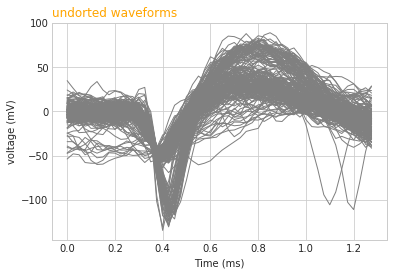

In [73]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# multiple line plot
fig = plt.figure()
ax = plt.axes()

for row in random_list:
    plt.plot(x, X[row,:], linewidth=1,color='gray')
    
# Add title & axis labels
plt.title("undorted waveforms", loc='left', fontsize=12, fontweight=0, color='orange')
plt.legend('')
plt.xlabel("Time (ms)")
plt.ylabel("voltage (mV)")

##  PCA Projection to 2D

In [ ]:
# necessary materials for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [81]:
pca = PCA(n_components=2)

In [82]:
principalComponents = pca.fit_transform(X)

In [83]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [84]:
principalDf.head(5)

,principal component 1,principal component 2
0,94.979039,-92.025717
1,-32.359500,75.351401
2,-4.015996,50.816331
3,16.717371,-53.700856
4,-68.069266,-5.126346


# Visualize 2D Projection
Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes. Do the classes seem well-separated from each other?

In [93]:
# ranmdom select unsorted wavefor to show
random_list2 = np.random.randint(0,a,5000)

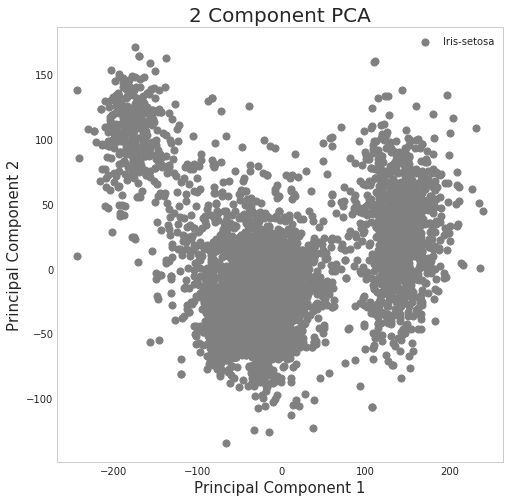

In [94]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

colors = ['gray']
for target, color in zip(targets,colors):
   # indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[random_list2, 'principal component 1']
               , principalDf.loc[random_list2, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## 4) Show me the head of your data.

## 5) Show me the shape of your data

## 6) Show me the proportion of missing observations for each column of your data

,Points1,Points2,Points3,Points4,Points5,Points6,Points7,Points8,Points9,Points10,...,Points43,Points44,Points45,Points46,Points47,Points48,Points49,Points50,Points51,Points52


(75785, 52)

## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

## 8) What is your _y_-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?